In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
signatures = ['SBS1', 'SBS2', 'SBS3', 'SBS5', 'SBS7a', 'SBS7b', 'SBS7c',
       'SBS7d', 'SBS8', 'SBS12', 'SBS13', 'SBS15', 'SBS17a', 'SBS17b', 'SBS18',
       'SBS26', 'SBS28', 'SBS36', 'SBS39', 'SBS40', 'SBS41', 'SBS56',
       'Signature.I', 'Signature.L', 'Signature.N']

In [4]:
df = pd.read_table('/home/t.cri.awoodard/life-history/mutation-signatures/mutational_sigs_all_with_clin_features_06112019.txt')

In [14]:
def get_threshold_counts(cutoff):
    counts = pd.DataFrame(data={
        'signature': signatures,
        'nigerians': [
            len(df[(df[signature] > cutoff) & (df['RACE_geno'] == 'Nigerian')])
            for signature in signatures
        ],
        'whites':  [
            len(df[(df[signature] > cutoff) & (df['RACE_geno'] == 'White')])
            for signature in signatures
        ],
        'blacks': [
            len(df[(df[signature] > cutoff) & (df['RACE_geno'] == 'Black')])
            for signature in signatures
        ]
        }
    )
    threshold = (counts['nigerians'] > 0) & (counts['whites'] == 0) & (counts['blacks'] == 0)
    return counts, counts[threshold]
    
    

In [16]:
for cutoff in np.arange(0.05, 0.4, 0.05):
    counts, select_counts = get_threshold_counts(cutoff)
    print('\n\n************** cutoff = {:.2f} **************'.format(cutoff))
    print(select_counts)



************** cutoff = 0.05 **************
      signature  nigerians  whites  blacks
9         SBS12          1       0       0
15        SBS26          1       0       0
20        SBS41          2       0       0
22  Signature.I          2       0       0
23  Signature.L          1       0       0


************** cutoff = 0.10 **************
      signature  nigerians  whites  blacks
11        SBS15          1       0       0
15        SBS26          1       0       0
20        SBS41          2       0       0
22  Signature.I          2       0       0
23  Signature.L          1       0       0


************** cutoff = 0.15 **************
      signature  nigerians  whites  blacks
11        SBS15          1       0       0
12       SBS17a          1       0       0
15        SBS26          1       0       0
17        SBS36          1       0       0
22  Signature.I          2       0       0
23  Signature.L          1       0       0


************** cutoff = 0.20 **************

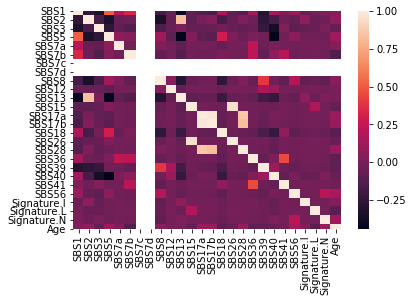

In [8]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

/home/t.cri.awoodard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


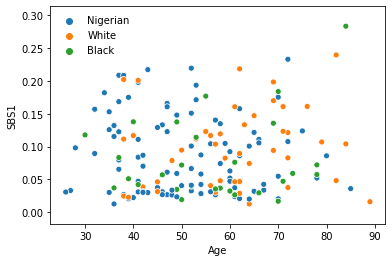

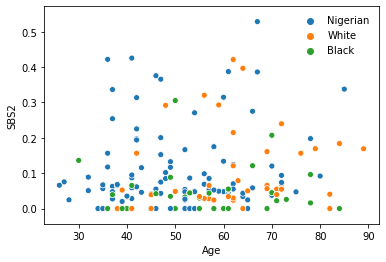

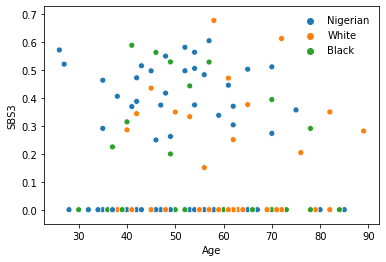

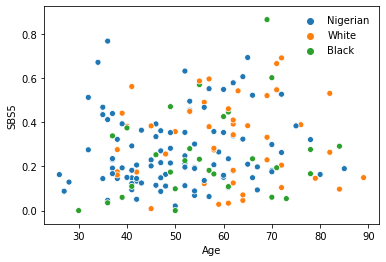

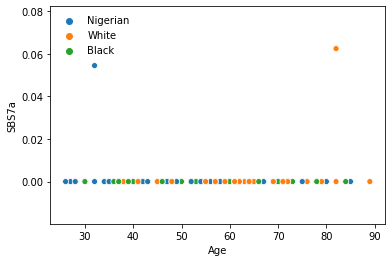

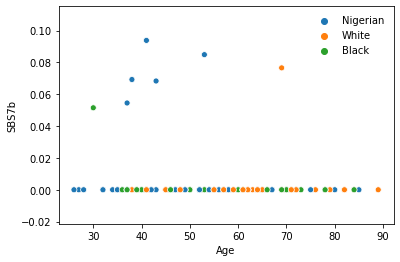

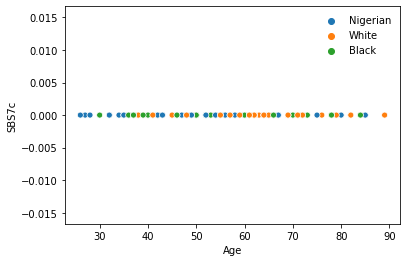

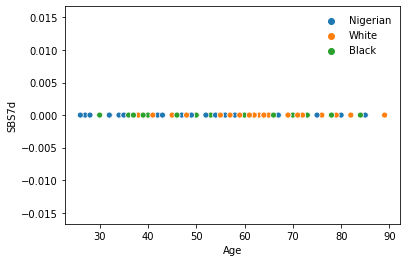

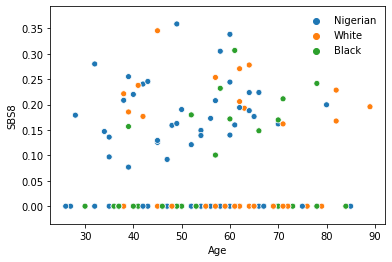

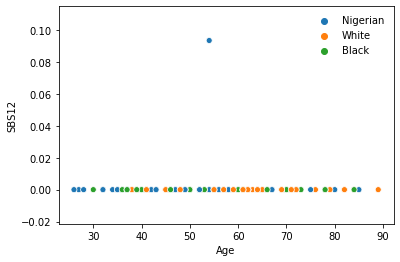

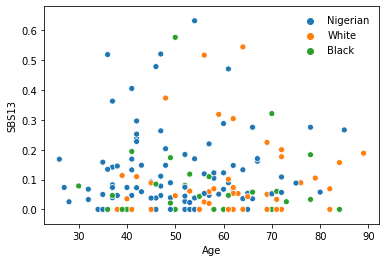

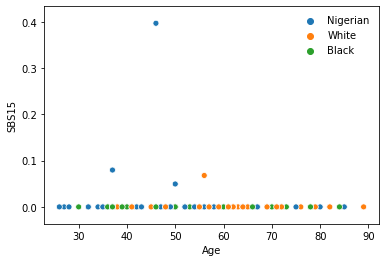

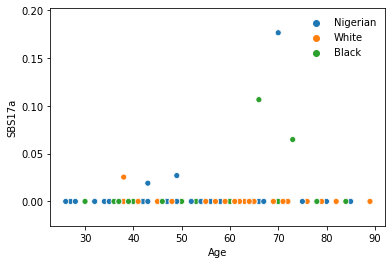

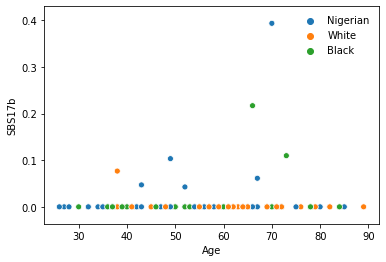

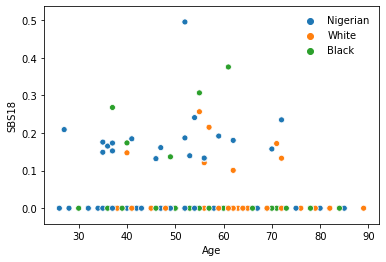

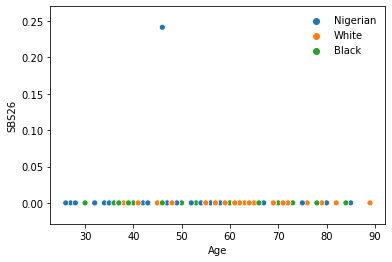

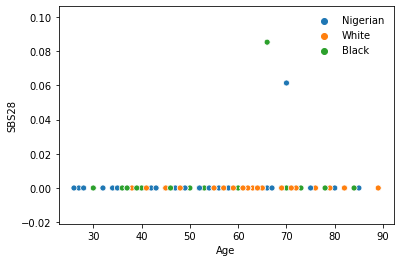

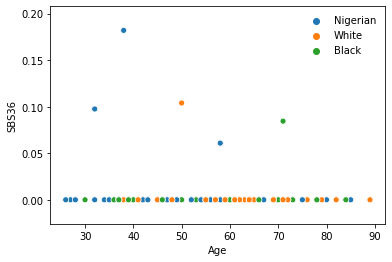

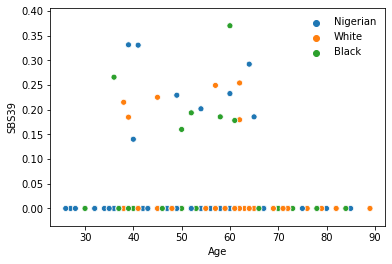

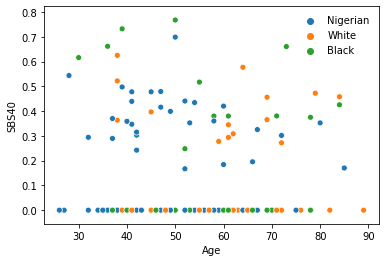

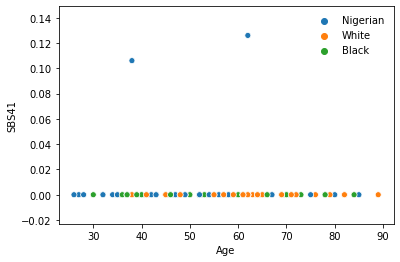

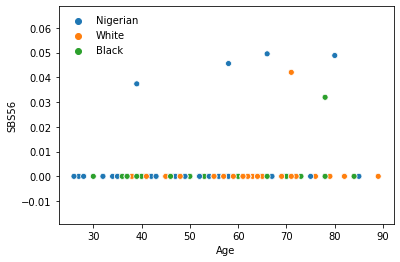

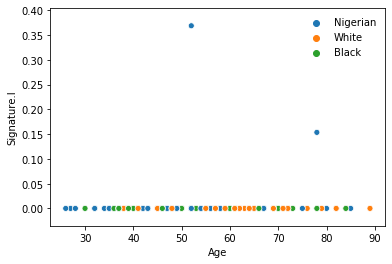

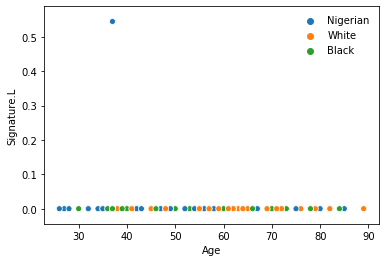

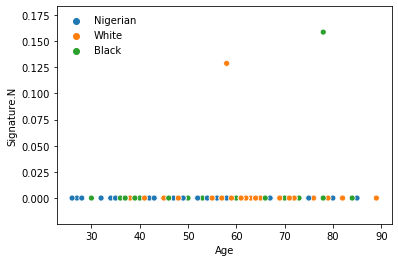

In [9]:
for signature in signatures:
    plt.figure()
    ax = sns.scatterplot(x="Age", y=signature, data=df, hue='RACE_geno')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:])